# **i. Perkenalan**

Program ini dapat digunakan pada e-commerce marketplace yang dapat mempermudah seller saat memakainya. Program ini dapat menawarkan tipe produk yang cocok digunakan kepada seller saat seller memasukkan produk mereka ke dalam marketplace. Hal ini dilakukan dengan membuat model deep learning klasifikasi berdasarkan data produk dari Januari 2020 hingga Januari 2024. Model tersebut akan memprediksi tipe produk berdasarkan deskripsi produk yang seller tulis. Informasi yang dihasilkan dari model ini nantinya akan dijadikan sebagai bahan pertimbangan untuk seller tentang tipe produk yang cocok digunakan untuk produk mereka.

## **A. Penjabaran masalah dan objektif berdasarkan SMART framework**

Specific:
Memudahkan seller dalam memilih tipe produk yang cocok digunakan atau merepresentasikan produk yang dijual oleh seller saat seller memasukkan produk mereka ke dalam marketplace. Sehingga bisa meminimalisir kesalahan pemberian tipe produk.

Measurable:
Minimnya jumlah produk yang ada dalam marketplace yang memiliki tipe produk yang tidak sesuai.

Achievable:
Membuat model deep learning yang bisa menentukan tipe produk yang cocok berdasarkan deskripsi produk yang seller isi.

Relevant:
Dengan menawarkan tipe produk yang cocok, seller akan mendapatkan pertimbangan tambahan akan tipe produk saat mereka masukkan produk mereka ke dalam marketplace. Pertimbangan tambahan ini dapat memudahkan pengalaman seller dalam menggunakan marketplace dan meminimalisir kesalahan pemberian tipe produk.

Time-bound:
Proyek ini perlu selesai dalam waktu 7 hari.

## **B. Penentuan jenis model machine learning**

Diperlukan model yang dapat menghasilkan jawaban tipe produk yang cocok antara Household; Books; Clothing & Accessories; atau Electronics. Empat jawaban ini merupakan atribut nominal multiclass. Maka dari itu, model yang dibutuhkan berjenis model klasifikasi. Diperlukan model dengan tingkat True Positive yang tinggi dimana model dapat memprediksi tipe produk dengan tepat. Lalu, model tidak fokus dalam memprediksi salah satu kategori dari empat tipe produk, sehingga model tidak memperhatikan nilai evaluasi recall atau precision dari produk Kemudian, kondisi data yang dimiliki memiliki kemungkinan bersifat imbalance, sehingga model perlu menggunakan nilai f-1 score rata-rata dari semua produk.

## **C. Penjabaran pemahaman bisnis seputar masalah**

Sebelumnya, proses untuk memasukkan tipe produk ke dalam marketplace bersifat manual. Kondisi ini dapat menyebabkan beberapa masalah dimana bisa saja tipe produk yang seller masukkan adalah salah atau tidak merepresentasikan produk yang seller jual. Jika hal tersebut terjadi, dampak negatif akan terjadi pada seller. Contoh, jika seller menjual produk gitar, namun seller memilih tipe produk sebagai alat elektronik, kemungkinan besar produk gitar akan sulit terjual. Produk gitar yang dijual seller akan berada di laman tipe produk alat elektronik, bukan alat musik. Pembeli yang berada di laman tipe produk alat elektronik bisa saja tidak tertarik pada produk gitar. Lalu, pembeli yang berada di laman tipe produk alat musik tidak bisa melihat produk gitar yang seller jual. Sehingga, produk gitar ini akan jarang dilihat oleh pembeli dan menimbulkan lamanya produk ini terjual.

seller yang mendapatkan produknya lama terjual dalam marketplace, akan memiliki pengalaman negatif saat menggunakan marketplace. seller bisa saja memberikan review negatif untuk marketplace karena pengalaman negatif ini. Hal ini dapat mempengaruhi calon seller baru dan dapat mengurangi minat mereka dalam menggunakan marketplace. Pada akhirnya, marketplace akan kesusahan dalam mencari seller baru dan menurunkan pendapatan marketplace.

Maka dari itu, untuk meminimalisir kesalahan ini, marketplace perlu memberikan rekomendasi tipe produk dari produk yang seller akan jual. Rekomendasi ini dapat digunakan untuk pertimbangan tambahan oleh seller untuk memilih tipe produk yang tepat.

## **E. Penjabaran Jenis Data yang Diperlukan**

Berdasarkan poin sebelumnya, diperlukan data yang berisi beberapa deksripsi produk beserta tipe produknya.

# **ii. Import Libraries**

Instalasi tensorflow 2.15.1

In [2]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
# Mengeluarkan versi tensorflow yang digunakan
import tensorflow as tf
print(tf.__version__)

2.15.1


Pastikan versi tensorflow adalah 2.15.1.
User perlu mengulang kernel setelah proses ini.

In [ ]:
# Memanggil Module

# Module pengolahan data
import numpy as np
import pandas as pd

# Module Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Module Feature Engineering
import re
import nltk
import spacy
from spacy.cli import download
from nltk.corpus import stopwords
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
from sklearn.feature_extraction.text import CountVectorizer

# Module Model Machine Learning
from sklearn.neighbors import KNeighborsClassifier

# Module Evaluasi Pemodelan
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Module Model Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# Module pengunduhan/penyimpanan model
import shutil
from google.colab import files
from wordcloud import WordCloud

# **iii. Data Loading**

## **A. Data Loading**

In [ ]:
# Membaca data csv dan mengubahnya sebagai dataframe
df_1 = pd.read_csv(r'https://zenodo.org/record/3355823/files/ecommerceDataset.csv?download=1', delimiter=',')

## **B. Menjelaskan maksud dari masing-masing atribut**

Bagian ini bertujuan untuk menjelaskan maksud dari masing-masing atribut. Informasi ini didapat dari deskripsi dari data.

In [ ]:
# Memperlihatkan sebagian dari dataframe
df_1.head(5)

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


Setiap baris data mengindikasi deskripsi dari suatu produk beserta tipe produktersebut.

Penjelasan dari atribut:
* Kolom pertama: Tipe dari produk - Kategorik
* Kolom kedua: Deskripsi dari produk - Teks panjang/Kategorik

## **C. Mengetahui relevansi data dengan masalah yang dijabarkan.**

Data yang tidak relevan dengan masalah yang dijabarkan dapat membuat tidak efisiennya pengerjaan EDA dan FE. Maka dari itu, relevansi ini perlu dicek. Bagian ini bertujuan untuk mengetahui apakah data yang dimiliki sesuai dengan yang dibutuhkan oleh model.

Data ini memiliki beberapa atribut dimana:
* Kolom pertama menjelaskan tentang deskripsi unik dari suatu produk yang berbeda dengan produk lainnya walau dengan tipe yang sama.
* Kolom kedua menjelaskan tentang tipe produk tersebut.

Berdasarkan penjelasan di atas, semua atribut data sesuai dengan kebutuhan automatisasi labelisasi produk dan data bisa cocok untuk pemodelan.

## **D. Persiapan data**

Bagian ini bertujuan untuk mempersiapkan data agar bisa dilakukan proses EDA, FE, dan pemodelan.

### **1. Mengubah nama kolom pada dataframe**

Berdasarkan poin sebelumnya, data yang digunakan tidak memiliki header atau nama kolom yang berada di atas data asli. Hal ini menyebabkan data asli dianggap sebagai nama kolom yang panjang dan menjadi tidak efisien. Maka dari itu, nama kolom perlu diubah.

In [4]:
# Membaca data csv dan mengubahnya sebagai dataframe dan membuat nama kolom sebagai type dan descriptions
df_1 = pd.read_csv(r'https://zenodo.org/record/3355823/files/ecommerceDataset.csv?download=1', header=None, names=['type', 'descriptions'], delimiter=',')
# Memperlihatkan data
df_1.head(5)

,type,descriptions
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


Berdasarkan tabel di atas, nama kolom sudah tergantikan.

### **2. Mengecek kesesuaian maksud atribut dengan tipe data**

Bagian ini bertujuan untuk mengecek kesesuaian maksud atribut dengan tipe data

In [ ]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          50425 non-null  object
 1   descriptions  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [ ]:
# Memperlihatkan data unik pada atribut type
df_1['type'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [ ]:
# Memperlihatkan contoh data pada atribut descriptions
df_1['descriptions'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

Berdasarkan informasi di atas,
* Atribut type memiliki tipe atribut object dimana sesuai dengan maksud dari atributnya yang berupa kategorik nominal.
* Atribut descriptions memiliki tipe atribut object dimana sesuai dengan maksud dari atributnya yang berupa kategorik atau teks panjang.

Maka dari itu, dapat disimpulkan bahwa semua atribut memiliki tipe data yang sesuai dengan maksudnya.

### **3. Mengecek baris data yang duplikat**

Data yang diambil dari sumber manapun bisa saja memiliki baris data yang duplikat. Hal ini terjadi karena adanya kesalahan pada input data. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk analisa regresi. Maka dari itu, kondisi ini perlu dicek.

In [5]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah baris data yang dihapus duplikatnya
print('Jumlah baris ketika baris duplikat dihilangkan adalah', df_1.drop_duplicates().shape[0])
print('Terdapat', df_1.shape[0]-df_1.drop_duplicates().shape[0], 'baris yang terduplikat')

Jumlah baris untuk keseluruhan data adalah 50425
Jumlah baris ketika baris duplikat dihilangkan adalah 27803
Terdapat 22622 baris yang terduplikat


Dari informasi di atas, terdapat 22622 baris yang memiliki kesamaan pada semua nilai atribut dengan baris lain. Hal ini ditandai oleh adanya perbedaan dari jumlah baris keseluruhan dan jumlah baris ketika baris duplikat dihilangkan. Maka dari itu, baris duplikat ini perlu dihilangkan.

In [6]:
# Menghilangkan baris duplikat
df_1 = df_1.drop_duplicates()

In [7]:
# Memperlihatkan jumlah keseluruhan baris data
print('Jumlah baris untuk keseluruhan data adalah', df_1.shape[0])
# Memperlihatkan jumlah baris data yang dihapus duplikatnya
print('Jumlah baris ketika baris duplikat dihilangkan adalah', df_1.drop_duplicates().shape[0])
print('Terdapat', df_1.shape[0]-df_1.drop_duplicates().shape[0], 'baris yang terduplikat')

Jumlah baris untuk keseluruhan data adalah 27803
Jumlah baris ketika baris duplikat dihilangkan adalah 27803
Terdapat 0 baris yang terduplikat


Berdasarkan informasi di atas, tidak ada baris yang duplikat sehingga penghapusan baris duplikat berhasil.

### **4. Mengecek cell dengan jumlah data lebih dari satu pada tipe data object**

Satu cell bisa saja memiliki data lebih dari satu dengan tipe data list atau dictionary. Hal ini terjadi karena adanya kesalahan pada proses input data. Maka dari itu, kondisi ini perlu dicek.

Untuk atribut kategorik, tipe data object dapat berarti semua cell berisi teks atau terdapat cell berisi list. Maka dari itu, atribut kategorik perlu dicek.

In [ ]:
def f_konsistensi_tipe_data(dataframe):
    '''
    Fungsi ini bertujuan untuk mencari cell pada dataframe yang memiliki tipe data list, dictionary, dan list

    Input: dataframe
    OutputL: Informasi nama_kolom, indeks, nilai_cell, dan tipe_data yang bertipe list, dictionary, atau list

    '''
    # Membuat list kosong yang akan diisi dengan baris yang memiliki tipe data bukan string dan angka
    data = {
        'nama_kolom': [],
        'indeks': [],
        'nilai_cell' : [],
        'tipe_data' : [],
    }
    df_temp = pd.DataFrame(data)
    # Melakukan looping nama-nama kolom
    for column_name in dataframe:
        # Melakukan looping baris
        for row_index in range(dataframe.shape[0]):
            # Conditional untuk mencari baris yang memiliki tipe data bukan string dan angka
            cell = dataframe[column_name].iloc[row_index]
            if type(cell) not in [np.float64, np.int64, str]:
                # Mengisi baris yang memiliki tipe data bukan string dan angka ke dalam dataframe
                new_row = pd.DataFrame({'nama_kolom': [column_name],
                                        'indeks': [row_index],
                                        'nilai_cell': dataframe[column_name].iloc[row_index],
                                        'tipe_data': type(dataframe[column_name].iloc[row_index])})
                df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    return df_temp

# Memanggil fungsi f_konsistensi_tipe_data untuk mengecek cell dengan jumlah data lebih dari satu pada tipe data object
df_temp = f_konsistensi_tipe_data(df_1)
df_temp.head(5)

,nama_kolom,indeks,nilai_cell,tipe_data
0,descriptions,22196.0,NaN,<class 'float'>


Dari tabel di atas, terdapat satu baris data yang memiliki cell dengan tipe float dengan nilai Nan. Kondisi ini akan ditangani pada proses EDA.

# **iv. Exploratory Data Analysis (EDA)**

## **A. Dimensi data**

Terdapat beberapa metode EDA, FE dan model yang hanya cocok pada data dengan kondisi dataset kecil dan low dimensionality. Menggunakan metode yang tidak sesuai dengan kondisi data dapat menghasilkan performa model yang rendah. Maka dari itu, kondisi ini perlu dicek.

In [ ]:
# Memperlihatkan dimensi dari data
df_1.shape

(27803, 2)

In [ ]:
# Memperlihatkan salah satu data
df_1['descriptions'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [ ]:
# Memperlihatkan jumlah kata dari salah satu data
text = df_1['descriptions'].iloc[0]
len(text.split())

228

Berdasarkan informasi di atas,
* Data memiliki jumlah baris sebanyak 27803 baris
* Data memiliki jumlah atribut sebanyak 2 atribut
* Data berisi teks dengan panjang 228 huruf.

Maka dari itu, data yang digunakan memiliki kondisi dataset yang besar dan bisa saja bersifat high dimensionality karena jumlah kata yang panjang.

## **B. Jumlah data unik**

Data yang memiliki atribut kategorik yang memiliki jumlah data unik yang terlalu banyak tidak dapat memberikan pola unik ke dalam pemodelan. Bagian ini bertujuan untuk melihat jumlah data unik untuk setiap atribut kategorik.

In [ ]:
def f_data_unik_kategorik(dataframe):
    '''
    Fungsi ini bertujuan untuk membuat daftar data unik yang ada di dalam semua atribut kategorik dataframe

    Input: dataframe
    Output: Informasi nama_kolom, jumlah_data_unik, dan data_unik yang dimiliki oleh dataframe

    '''
    # Mempersiapkan dataframe kosong
    data = {'nama_kolom': [],
            'jumlah_data_unik': [],
            'data_unik': []}
    df_temp = pd.DataFrame(data)
    # Looping berdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter data bertipe object
        if dataframe[column_name].dtype == 'O':
            # Menghitung jumlah data unik
            jumlah_data_unik = dataframe[column_name].value_counts().count()
            # Membuat daftar data unik
            if jumlah_data_unik<20: data_unik = '; '.join([i for i in dataframe[column_name].unique()])
            else: data_unik = 'TOO MANY'
            # Memasukkan informasi data unik ke dalam dataframe
            new_row = pd.DataFrame({'nama_kolom': [column_name],
                                    'jumlah_data_unik': [jumlah_data_unik],
                                    'data_unik': [data_unik]})
            df_temp = pd.concat([df_temp, new_row], ignore_index=True)
    # Mengeluarkan informasi data unik
    return df_temp

In [ ]:
# Memanggil fungsi f_data_unik_kategorik untuk melihat data unik setiap atribut
df_temp = f_data_unik_kategorik(df_1)
# Menyetel ukuran dataframe yang diperlihatkan
pd.set_option('max_colwidth', None)
print('Jumlah Total Baris Data', df_1.shape[0])
# Memperlihatkan dataframe
df_temp

Jumlah Total Baris Data 27803


,nama_kolom,jumlah_data_unik,data_unik
0,type,4.0,Household; Books; Clothing & Accessories; Electronics
1,descriptions,27802.0,TOO MANY


Dari tabel di atas,
* Kolom type yang merupakan target feature memiliki 4 data unik. Maka dari itu pemodelan tidak akan terganggu dari kolom type.
* Kolom descriptions memiliki 27802 data unik, hampir sama dengan jumlah baris keseluruhan data. Hal ini terjadi karena kolom ini berisi teks panjang yang mendeskripsikan suatu produk yang unik, sehingga nilai tiap kolomnya dapat berbeda. Dikarenakan kolom ini bertipe kategorik, kondisi ini dapat tidak memberikan pola apa pun pada model. Maka dari itu, kondisi ini perlu ditangani pada proses FE.

## **C. Distribusi Data**

Terdapat beberapa metode EDA, FE dan model yang hanya cocok pada data dengan kondisi distribusi normal. Distribusi data yang tidak normal adalah kondisi dimana tidak terdapat banyak data pada nilai tertentu dibandingkan nilai lainnya. Menggunakan metode yang tidak sesuai dengan kondisi data dapat menghasilkan performa model yang rendah. Maka dari itu, kondisi ini perlu dicek.

In [ ]:
def f_distribusi_kategorik(dataframe, drop_feature=''):
    '''
    Fungsi ini bertujuan untuk melihat frekuensi dan persentase data unik untuk semua atribut kategorik

    Input: dataframe, atribut yang tidak ingin diikutkan
    Output: Informasi nama_kolom, nama_unique_data, jumlah, dan persentase yang dimiliki oleh data unik untuk semua atribut kategorik

    '''
    # Menghilangkan atribut yang tidak ingin diikutkan
    if drop_feature != '': dataframe = dataframe.drop(drop_feature, axis=1)
    # Membuat dataframe kosong yang nantinya akan diisi oleh informasi distribusi data
    data = {'nama_kolom': [],
            'nama_unique_data': [],
            'jumlah' : [],
            'persentase' : []}
    df_temp = pd.DataFrame(data)

    # Melakukan looping beerdasarkan nama kolom
    for column_name in dataframe:
        # Menfilter atribut yang bertipe string
        if dataframe[column_name].dtype == 'O':
            # Melakukan looping berdasarkan index unik data
            for unique_data in dataframe[column_name].unique():
                # Membuat baris dataframe baru berisi jumlah dan persentase data unik
                jumlah = dataframe[dataframe[column_name]==unique_data].count().max()
                persentase = round(jumlah/dataframe.shape[0]*100)
                new_row = pd.DataFrame({'nama_kolom': [column_name],
                                        'nama_unique_data': [unique_data],
                                        'jumlah': [jumlah],
                                        'persentase': [persentase]
                                        })
                # Menggabungkan dataframe sebelumnya dengan yang baru
                df_temp = pd.concat([df_temp, new_row])
    return df_temp

In [ ]:
# Menghilangkan kolom descriptions karena memiliki jumlah data unik yang banyak
df_temp = df_1['type'].to_frame()
# Memanggil fungsi f_distribusi_kategorik untuk mengecek distribusi data kategorik
df_temp = f_distribusi_kategorik(df_temp)
# Memperlihatkan dataframe
df_temp

,nama_kolom,nama_unique_data,jumlah,persentase
0,type,Household,10564.0,38.0
0,type,Books,6256.0,23.0
0,type,Clothing & Accessories,5675.0,20.0
0,type,Electronics,5308.0,19.0


In [ ]:
def f_bar_kategorik(dataframe, fig_per_row = 3, hor_size = 20, ver_size = 10, label_fontsize=14):
    '''
    Fungsi ini bertujuan untuk memperlihatkan bar chart dari atribut kategorik

    Input: dataframe,
           fig_per_row : Pengaturan jumlah figure dalam baris
           hor_size : Ukuran horizontal figure
           ver_size : Ukuran vertikal figure
    Output: Bar chart dari atribut kategorik

    '''
    # List kolom numerik
    kolom_numeric = [i for i in dataframe if dataframe[i].dtype != 'O']

    # Membuat dataframe kosong
    df_temp = pd.DataFrame()
    # Menghilangkan atribut numeric pada dataframe
    df_temp = dataframe.drop(columns=kolom_numeric)

    # Mencari nilai frekuensi maksimum dari semua kolom untuk membuat y-axis scale yang sama
    frek_maks = df_temp.apply(lambda column_name: column_name.value_counts().max()).max()

    # Membuat bar chart
    row = math.ceil(df_temp.shape[1]/fig_per_row)
    fig, ax = plt.subplots(row, fig_per_row, figsize=(hor_size, ver_size))
    if df_temp.shape[1] != 1:
        ax = ax.flatten()

    # Mengatur bar chart
    for i, column_name in enumerate(df_temp):
        counts = df_temp[column_name].value_counts()
        colors = [[random.random() for _ in range(3)] for _ in range(len(counts))] # Membuat warna random
        if df_temp.shape[1] != 1:
            ax[i].bar(counts.index, counts.values, color=colors)
            ax[i].set_title(f'Distribusi atribut {column_name}')
            ax[i].set_xlabel(column_name, fontsize=label_fontsize)
            ax[i].set_ylabel('Frequency', fontsize=label_fontsize)
            ax[i].set_ylim(0, frek_maks) # Menyamakan semua scale pada y-axis
        else:
            ax.bar(counts.index, counts.values, color=colors)
            ax.set_title(f'Distribusi atribut {column_name}')
            ax.set_xlabel(column_name, fontsize=label_fontsize)
            ax.set_ylabel('Frequency', fontsize=label_fontsize)
            ax.set_ylim(0, frek_maks)

    if df_temp.shape[1] != 1:
        # Menghilangkan bingkai fig yang tidak terpakai
        for j in range(i + 1, len(ax)):
            ax[j].set_visible(False)

    # Memberikan figure
    return fig, ax

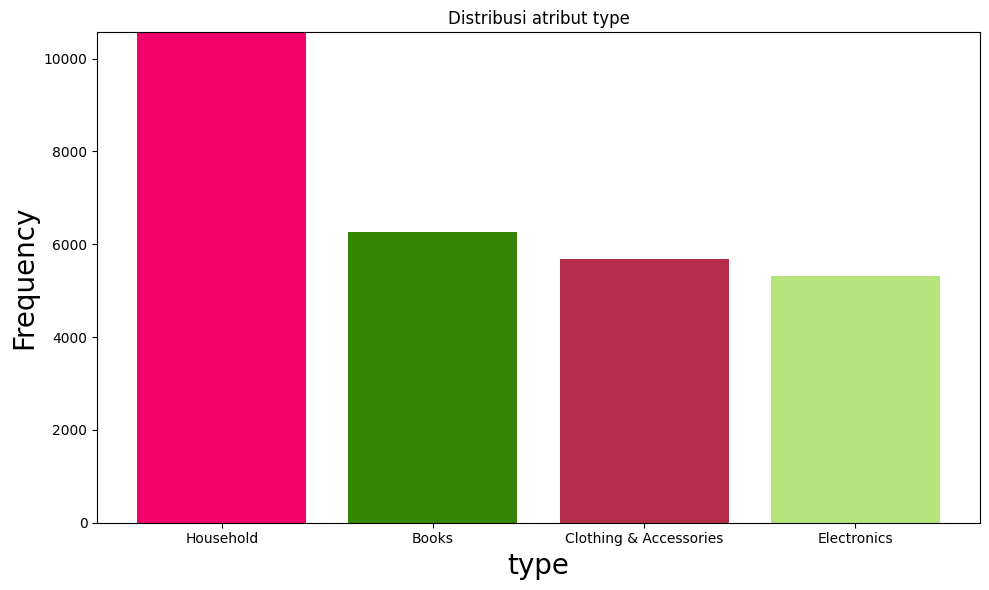

In [ ]:
# Menghilangkan kolom descriptions karena memiliki jumlah data unik yang banyak
df_temp = df_1['type'].to_frame()
# Menggunakan fungsi f_bar_kategorik untuk membuat bar chart dari atribut kategorik
fig, ax = f_bar_kategorik(dataframe = df_temp,
                          fig_per_row = 1,
                          hor_size = 10,
                          ver_size = 6,
                          label_fontsize=20)
plt.tight_layout()
plt.show()

Berdasarkan informasi dan visual di atas,
* Atribut type memiliki kondisi distribusi kategori yang relatif seimbang, yakni kategori Household (38%), Books (23%), Clothing & Accessories (20%), dan Electronics (19%).

## **D. Missing Values**

Data yang diambil dari sumber manapun bisa saja memiliki missing value dimana suatu feature pada baris tertentu tidak memiliki nilai apapun. Kondisi ini mengakibatkan data tersebut tidak bisa dipakai untuk analisa regesi. Maka dari itu, kondisi ini perlu dicek.

### 1. Mengecek missing values yang ditandai dengan None

In [8]:
# Memperlihatkan informasi general dari dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27803 entries, 0 to 50410
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          27803 non-null  object
 1   descriptions  27802 non-null  object
dtypes: object(2)
memory usage: 651.6+ KB


In [9]:
# Memperlihatkan missing values
df_1[df_1['descriptions'].isnull()]

,type,descriptions
39330,Clothing & Accessories,NaN


Berdasarkan informasi di atas, atribut type memiliki missing values pada satu baris. Maka dari itu, missing values ini perlu dihilangkan.

In [10]:
# Menghilangkan missing values
df_1 = df_1.dropna()

In [11]:
# Memperlihatkan missing values
df_1[df_1['descriptions'].isnull()]

,type,descriptions


Berdasarkan informasi di atas, data sudah tidak memiliki missing values. Maka dari itu, proses penghilangan missing values berhasil.

## **E. Outliers**

Berdasarkan poin sebelumnya, data hanya memiliki dua fitur. Fitur type yang berisi 4 kategori, Household, Books, Clothing & Accessories, dan Electronics yang sudah terbukti tidak memiliki outlier. Lalu, ada fitur descriptions yang berupa fitur kategorik yang berisi teks panjang yang berbeda tiap barisnya dimana tidak memiliki outlier. Maka dari itu, pencarian outlier tidak dilakukan.

## **F. Hubungan atribut terhadap target feature**

Berdasarkan poin sebelumnya, data hanya memiliki satu fitur non-target. Fitur descriptions berupa fitur kategorik yang berisi teks panjang yang berbeda tiap barisnya. Fitur ini tidak memiliki pola unik kepada target feature dengan kondisi sekarang. Maka dari itu, penelitian hubungan atribut terhadap target feature tidak dilakukan.

## **G. Kata dengan jumlah tarbanyak dari fitur descriptions**

Berdasarkan poin sebelumnya, fitur descriptions berupa fitur kategorik yang berisi teks panjang yang berbeda tiap barisnya. Bagian ini bertujuan untuk menunjukkan kata dengan jumlah tarbanyak dari fitur descriptions.

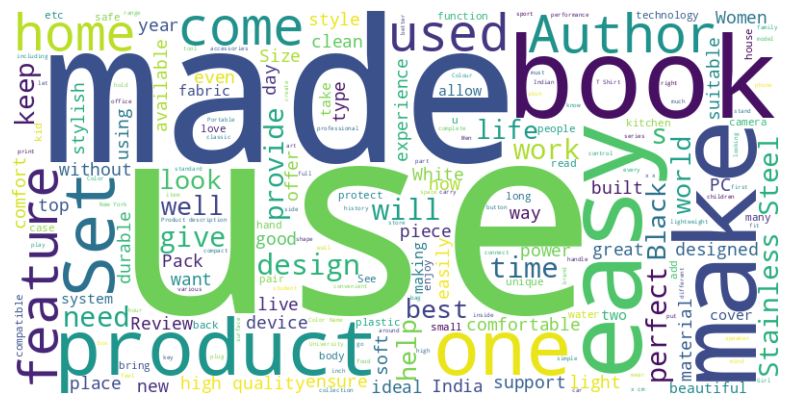

In [ ]:
# Menggabungkan seluruh kata dalam fitur descriptions menjadi satu variabel
text_data = " ".join(df_1['descriptions'].astype(str))

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Memperlihatkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Berdasarkan visual di atas, fitur descriptions didominasi oleh beberapa kata yang sama, diantaranya:
* made
* use
* book
* make
* used
* one
* product
* feature

Dapat dilihat bahwa terdapat beberapa kata yang tidak memberikan makna khusus seperti made, use, dan product. Artinya, kata-kata ini bisa saja terdapat pada semua tipe produk dan tidak memberikan pola unik pada model. Kondisi ini perlu ditangani pada proses FE.

Lalu, dapat dilihat bahwa terdapat beberapa kata yang berbeda namun memiliki makna yang sama seperti make-made dan use-used. Kata-kata ini dapat meningkatkan redudansi yang memberatkan model. Kondisi ini perlu ditangani pada proses FE.

## **H. Kesimpulan EDA**

Berikut merupakan kesimpulan dari proses EDA:
* Data memiliki kemungkinan high dimensionality sehingga deep learning akan lebih cocok untuk pemodelan
* Data memiliki 4 jumlah kategori tipe produk, sehingga klasifikasi bersifat multiclass.
* Data memiliki beberapa kata yang tidak bermakna.
* Data memiliki beberapa kata yang bermanka sama.

# **v. Feature Engineering**

## **A. Mengubah label pada fitur target**

Berdasarkan poin sebelumnya, fitur type dijadikan sebagai fitur target dalam pemodelan. Namun, fitur ini bersifat kategorik yang memiliki tipe object atau string dimana dapat menyulitkan pemodelan deep learning. Maka dari itu, bagian ini bertujuan untuk mengubah label fitur target menjadi angka.

In [12]:
# Memperlihatkan data unik pada fitur type
df_1['type'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [13]:
# Mengubah label pada fitur target
df_1.loc[:,'label'] = df_1['type'].replace({'Household' : 0,
                                            'Books' : 1,
                                            'Clothing & Accessories' : 2,
                                            'Electronics' : 3})

<ipython-input-13-20cc540758f6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.loc[:,'label'] = df_1['type'].replace({'Household' : 0,


## **B. Split Dataset, train data and test data**

Bagian ini bertujuan untuk memisahkan baris data yang dimiliki menjadi data train-validation dan data test. Data train-validation digunakan saat melatih model dan data test digunakan untuk mengevaluasi model. Perbandingan jumlah data train dengan data test adalah 70% : 30%.

In [14]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_1['descriptions'],
                                                            df_1['label'],
                                                            test_size=0.3,
                                                            random_state=10)

## **C. Vektorisasi data dengan metode count-based atau sparse matrix dari library sklearn**

Seperti yang sudah dijelaskan sebelumnya, fitur descriptions berisi teks panjang dimana tiap barisnya memiliki nilai yang berbeda. Fitur ini tidak bisa langsung dimasukkan atau dibaca oleh model karena model tidak mampu membaca pola dari data. Bagian ini bertujuan untuk mengubah nilai dari fitur descriptions menjadi susunan angka atau vektor yang bisa dibaca oleh model.

Salah satu jenis vektorisasi adalah vektorisasi berdasarkan count-based dari library sklearn. Vektorisasi ini akan membuat sparse matrix. Cara kerja dari vektorisasi ini adalah, contoh, jika seluruh data mengandung 5 kata, yaitu saya, kamu, belajar, di, dan hacktiv, data akan memiliki 5 kolom baru, berisi saya, kamu, belajar, di, dan hacktiv. Lalu, jika baris pertama mengandung nilai 'saya belajar di hacktiv', kolom saya, belajar, di, dan hacktiv akan bernilai 1. Sedangkan kolom kamu akan bernilai 0.

In [ ]:
# Melakukan vektorisasi count-based
def f_vektorisasi_data_train_test(train, test):
    # Mendefinisikan model vektorisasi
    vect = CountVectorizer()

    # Mengadaptasi model vektorisasi berdasarkan train
    vect.fit(train)

    # Melakukan vektorisasi
    train_vect = vect.transform(train)
    test_vect = vect.transform(test)

    return train_vect, test_vect

# Melakukan vektorisasi count-based
X_train_val_vect, X_test_vect = f_vektorisasi_data_train_test(train = X_train_val,
                                                                  test = X_test)

In [ ]:
# Memperlihatkan hasil vektorisasi
df_temp = pd.DataFrame.sparse.from_spmatrix(X_train_val_vect,
                                            columns=CountVectorizer()
                                            .fit(X_train_val)
                                            .get_feature_names_out())
df_temp.head(5)

,00,000,0000,0001,00020,0005,000764,0008,0008a,000915005477001,...,శక,సత,సమ,①supports,②supports,③ergonomics,③supports,④anti,④supports,ヒッジー
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Berdasarkan informasi di atas, fitur descriptions berhasil divektorisasi yang menghasilkan 65429 kolom baru.

## **D. Melakukan pemodelan basic**

Kegiatan yang akan dilakukan selanjutnya adalah melakukan beberapa pre-processing atau mengubah data yang dimiliki agar memudahkan pemodelan. Untuk mengetahui pengaruh teknik pre-processing pada pemodelan, perlu dilakukan adanya perbandingan model yang dilatih menggunakan data dengan pre-processing dan basic model atau model yang tidak dilatih menggunakan data dengan pre-processing.

Bagian ini bertujuan untuk membuat model serta mengevaluasinya menggunakan data tanpa pre-processing. Data yang digunakan tidak missing value, tidak ada duplikat, dan sudah divektorisasi (secara count-based). Pemodelan menggunakan model knn dengan hyperparameter default. Model ini digunakan karena bisa mempelajari data high dimensionality.

In [ ]:
# Basic Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)

# Basic Model training
model_knn_vect.fit(X_train_val_vect, y_train_val)

KNeighborsClassifier()

In [ ]:
# Fungsi untuk mengevaluasi model
def f_evaluasi_model(name, model, X_train, X_test, y_train, y_test):
   evaluasi_model = {}
   # Model prediction
   y_pred_train = model.predict(X_train)
   y_pred_test = model.predict(X_test)
   # Mengevaluasi model
   evaluasi = {'train accuracy' : accuracy_score(y_train, y_pred_train),
               'test accuracy' : accuracy_score(y_test, y_pred_test),
               'train f1_score' : f1_score(y_train, y_pred_train, average='macro'),
               'test f1_score' : f1_score(y_test, y_pred_test, average='macro')}
   evaluasi_model[name] = evaluasi
   df_temp = pd.DataFrame(evaluasi_model)

   # Mengeluarkan dataframe yang berisi model evaluation
   return df_temp

In [ ]:
# Basic Model Evaluation
df_eval_basic = f_evaluasi_model(name = 'Model Basic',
                                 model = model_knn_vect,
                                 X_train = X_train_val_vect,
                                 X_test = X_test_vect,
                                 y_train = y_train_val,
                                 y_test = y_test)

# Memperlihatkan Basic Model Evaluation
df_eval_basic

,Model Basic
train accuracy,0.772417
test accuracy,0.693202
train f1_score,0.780546
test f1_score,0.705506


Berdasarkan tabel di atas, model memiliki evaluasi yang underfit (f1 score 0.78) dan overfit (f1 score train dan test memiliki perbedaan yang signifikan).

## **E. Menghilangkan karakter yang tidak bermakna**

Terdapat beberapa karakter yang tidak memiliki makna tertentu dan tidak sesuai dengan konteks. Karakter-karakter tersebut adalah !@#$% yang tidak memiliki pola tententu dengan tipe produk. Maka dari itu, karakter-karakter ini perlu dihilangkan agar tidak memperberat pemodelan. Selain itu, terdapat pula karakter yang perlu dihilangkan seperti spasi yang berlebihan, baris ganda, dan link website. Kemudian, untuk menyederhanakan kata, karakter kapital juga perlu dikecilkan.

In [21]:
# Fungsi untuk menghilangkan karakter yang tidak bermakna
def f_menghilangkan_karakter_tidak_bermakna(text):
  # Mengkecilkan huruf
  text = text.lower()

  # Menghilangkan karakter spesial dan angka
  text = re.sub(r'[^A-Za-z\s]', '', text)

  # Menghilangkan baris ganda
  text = re.sub(r'\\n', ' ',text)

  # Menghilangkan spasi ganda
  text = text.strip()

  # Menghilangkan link website
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  return text

In [ ]:
# Menghilangkan karakter yang tidak bermakna
X_train_val_2 = pd.DataFrame(X_train_val)['descriptions'].apply(lambda x: f_menghilangkan_karakter_tidak_bermakna(x))
X_test_2 = pd.DataFrame(X_test)['descriptions'].apply(lambda x: f_menghilangkan_karakter_tidak_bermakna(x))

In [ ]:
# Melakukan vektorisasi
X_train_val_2_vect, X_test_2_vect = f_vektorisasi_data_train_test(train = X_train_val_2,
                                                                  test = X_test_2)

In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_2_vect, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_temp = f_evaluasi_model(name = 'Model dengan menghilangkan karakter yang tidak bermakna',
                           model = model_knn_vect,
                           X_train = X_train_val_2_vect,
                           X_test = X_test_2_vect,
                           y_train = y_train_val,
                           y_test = y_test)

pd.concat([df_eval_basic, df_temp], axis=1)

,Model Basic,Model dengan menghilangkan karakter yang tidak bermakna
train accuracy,0.772417,0.774883
test accuracy,0.693202,0.690085
train f1_score,0.780546,0.783895
test f1_score,0.705506,0.703619


In [ ]:
# Memperlihatkan dimensi dari data yang tidak dihilangkan karakter yang tidak bermakna
X_train_val_vect

<19461x65429 sparse matrix of type '<class 'numpy.int64'>'
	with 1341869 stored elements in Compressed Sparse Row format>

In [ ]:
# Memperlihatkan dimensi dari data yang tidak dihilangkan karakter yang tidak bermakna
X_train_val_2_vect

<19461x78086 sparse matrix of type '<class 'numpy.int64'>'
	with 1286931 stored elements in Compressed Sparse Row format>

Berdasarkan tabel di atas, pre-processing dengan menghilangkan karakter yang tidak bermakna memiliki pengaruh tidak signifikan pada pemodelan dimana tidak ada peningkatan dari nilai evaluasi. Namun, stored element pada tabel berkurang dari 1341869 menjadi 1286931. Kondisi ini dapat mengurangi berat pemodelan. Maka dari itu, pre-processing ini akan digunakan pada pemodelan deep learning.

## **F. Menghilangkan kata yang tidak bermakna dengan stopwords**

Terdapat beberapa kata yang tidak memiliki makna tertentu dan tidak sesuai dengan konteks. Kata-kata tersebut adalah 'was', 'were', atau 'be' yang tidak memiliki pola tententu dengan tipe produk. Maka dari itu, kata-kata ini perlu dihilangkan agar tidak memperberat pemodelan.

Pre-processing ini menggunakan stopwords dari nltk.

In [25]:
# Mengunduh vocabulary stopwords dari nltk berbahasa inggris
nltk.download('stopwords')
stpwds_en = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Menghilangkan kata yang tidak bermakna
def f_menghilangkan_kata_tidak_bermakna(text):
  # Mengubah teks menjadi list berdasarkan spasi
  tokens = re.findall(r'\w+|[^\w\s]', text)

  # Menghilangkan kata stopwords
  tokens = [word for word in tokens if word not in stpwds_en]

  # Menggabungkan kata pada list menjadi teks
  text = ' '.join(tokens)

  return text

In [ ]:
# Menghilangkan kata yang tidak bermakna
X_train_val_2 = pd.DataFrame(X_train_val)['descriptions'].apply(lambda x: f_menghilangkan_kata_tidak_bermakna(x))
X_test_2 = pd.DataFrame(X_test)['descriptions'].apply(lambda x: f_menghilangkan_kata_tidak_bermakna(x))

In [ ]:
# Melakukan vektorisasi
X_train_val_2_vect, X_test_2_vect = f_vektorisasi_data_train_test(train = X_train_val_2,
                                                                  test = X_test_2)

In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_2_vect, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_temp = f_evaluasi_model(name = 'Model dengan menghilangkan kata yang tidak bermakna',
                           model = model_knn_vect,
                           X_train = X_train_val_2_vect,
                           X_test = X_test_2_vect,
                           y_train = y_train_val,
                           y_test = y_test)

pd.concat([df_eval_basic, df_temp], axis=1)

,Model Basic,Model dengan menghilangkan kata yang tidak bermakna
train accuracy,0.772417,0.807101
test accuracy,0.693202,0.743676
train f1_score,0.780546,0.816128
test f1_score,0.705506,0.759471


Berdasarkan tabel di atas, pre-processing dengan menghilangkan kata yang tidak bermakna memiliki pengaruh pada pemodelan dimana meningkatkan semua nilai evaluasi. Maka dari itu, pre-processing ini akan digunakan pada pemodelan deep learning.

## **G. Menghilangkan kata yang bermakna sama dengan lemmanization**

Terdapat beberapa kata yang memiliki makna yang sama namun memiliki bentuk yang berbeda. Kondisi ini dapat memperberat pemodelan. Kata-kata tersebut adalah 'was-were', 'run-running' atau 'people-person'. Maka dari itu, kata-kata ini perlu disamakan bentuknya agar tidak memperberat pemodelan.

Pre-processing ini menggunakan en_core_web_sm dari spacy.

In [27]:
# Mengunduh en_core_web_sm dari spacy
download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
# Fungsi untuk menghilangkan kata yang bermakna sama
def f_menghilangkan_kata_bermakna_sama(text):
  # Melakukan Lemmanization
  tokens = [token.lemma_ for token in nlp(text)]
  text = ' '.join(tokens)

  return text

In [ ]:
# Menghilangkan kata yang bermakna sama
X_train_val_2 = pd.DataFrame(X_train_val)['descriptions'].apply(lambda x: f_menghilangkan_kata_bermakna_sama(x))
X_test_2 = pd.DataFrame(X_test)['descriptions'].apply(lambda x: f_menghilangkan_kata_bermakna_sama(x))

In [ ]:
# Melakukan vektorisasi data
X_train_val_2_vect, X_test_2_vect = f_vektorisasi_data_train_test(train = X_train_val_2,
                                                                  test = X_test_2)

In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_2_vect, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_temp = f_evaluasi_model(name = 'Model dengan menghilangkan kata bermakna sama',
                           model = model_knn_vect,
                           X_train = X_train_val_2_vect,
                           X_test = X_test_2_vect,
                           y_train = y_train_val,
                           y_test = y_test)

pd.concat([df_eval_basic, df_temp], axis=1)

,Model Basic,Model dengan menghilangkan kata bermakna sama
train accuracy,0.772417,0.787370
test accuracy,0.693202,0.710227
train f1_score,0.780546,0.793099
test f1_score,0.705506,0.719173


Berdasarkan tabel di atas, pre-processing dengan menyamakan kata yang bermakna sama memiliki pengaruh pada pemodelan dimana meningkatkan semua nilai evaluasi. Maka dari itu, pre-processing ini akan digunakan pada pemodelan deep learning.

## **H. Vektorisasi data dengan metode tokenization atau sequences of integers dari library Tensor**



Selain vektorisasi data count-based seperti yang dijelaskan sebelumnya, terdapat pula vektorisasi metode tokenization atau sequences of integers dari library Tensor. Bagian ini bertujuan untuk melakukan vektorisasi ini.

Vektorisasi ini bekerja dengan membuat vocabulary yang berisi seluruh kata yang terkandung dalam data. Vocabulary ini memiliki indeks berdasarkan banyaknya suatu kata ada dalam data. Kata yang memiliki jumlah yang banyak pada data memiliki indeks yang lebih kecil. Kemudian, metode ini mencari jumlah kata terbanyak pada suatu baris. Lalu, metode ini akan membuat beberapa kolom baru dengan jumlah kata terbanyak pada suatu baris. Kolom-kolom ini akan berisi indeks dari vocabulary yang dibuat sebelumnya.

In [ ]:
# Melakukan vektorisasi data berdasarkan count-based
Vectorize = CountVectorizer()
Vectorize.fit(X_train_val)
# Mencari jumlah keseluruhan data yang ada dalam vocabulary
total_vocab = len(Vectorize.vocabulary_.keys())
# Mencari jumlah kata terbanyak pada suatu baris
max_sen_len = max([len(i.split(" ")) for i in X_train_val])

In [ ]:
# Mendefinisikan vektorisasi data dengan metode tokenization berdasarkan total_vocab dan max_sen_len
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

# Mengadaptasi vektorisasi data dengan metode tokenization berdasarkan total_vocab dan max_sen_len
text_vectorization.adapt(X_train_val)

# Melakukan vektorisasi data dengan metode tokenization berdasarkan total_vocab dan max_sen_len
X_train_val_vect_2 = text_vectorization(X_train_val)
X_test_vect_2 = text_vectorization(X_test)

In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_vect_2, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_vect = f_evaluasi_model(name = 'Model dengan vektorisasi Tensor',
                           model = model_knn_vect,
                           X_train = X_train_val_vect_2,
                           X_test = X_test_vect_2,
                           y_train = y_train_val,
                           y_test = y_test)

pd.concat([df_eval_basic, df_vect], axis=1)

,Model Basic,Model dengan vektorisasi Tensor
train accuracy,0.772417,0.551976
test accuracy,0.693202,0.359549
train f1_score,0.780546,0.503249
test f1_score,0.705506,0.303061


In [ ]:
# Memperlihatkan dimensi dari data dengan vektorisasi count-based
X_train_val_vect

<19461x65429 sparse matrix of type '<class 'numpy.int64'>'
	with 1341869 stored elements in Compressed Sparse Row format>

In [ ]:
# Memperlihatkan dimensi dari data dengan vektorisasi dengan metode tokenization
X_train_val_vect_2

<tf.Tensor: shape=(19461, 8171), dtype=int64, numpy=
array([[ 1326, 28446,     1, ...,     0,     0,     0],
       [   65, 29777,     1, ...,     0,     0,     0],
       [ 9691,    57,   212, ...,     0,     0,     0],
       ...,
       [16550,    55,   212, ...,     0,     0,     0],
       [ 1326,     1, 11046, ...,     0,     0,     0],
       [  164,   831,   276, ...,     0,     0,     0]])>

Berdasarkan tabel di atas, pre-processing dengan vektorisasi metode tokenization memiliki pengaruh menurunkan nilai evaluasi model machine learning. Namun, jumlah kolom pada tabel berkurang dari 65429 menjadi 8171. Kondisi ini dapat mengurangi berat pemodelan deep learning. Maka dari itu, pre-processing ini akan digunakan pada pemodelan deep learning.

## **I. Vektorisasi data dengan metode tokenization dan Melakukan Embedding**

Terdapat beberapa kata yang memiliki makna yang mirip (bukan sama) seperti meja-kursi, anggur-jeruk, atau orang-manusia. Untuk memudahkan kerja model, nilai dari vektorisasi dari kata yang mirip perlu juga mirip. Bagian ini bertujuan untuk melakukan vektorisasi ini dengan melakukan vektorisasi metode tokenization ditambah dengan metode embedding. Data menggunakan vektorisasi metode tokenization hasil dari poin sebelumnya. Salah satu parameter dari embedding adalah output_dim, dimana bagian ini menggunakan nilai 64 dan 128.

In [ ]:
# Melakukan embedding dengan output_dim 64
embedding = Embedding(input_dim=total_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

def f_embedding_dalam_batch(data, embedding_layer, batch_size):
    embedded = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        embedded_batch = embedding_layer(tf.convert_to_tensor(batch)).numpy()
        embedded_mean = embedded_batch.mean(axis=1)
        embedded.append(embedded_mean)
    return np.vstack(embedded)

X_train_val_vect_3 = f_embedding_dalam_batch(data = X_train_val_vect_2,
                                               embedding_layer = embedding,
                                               batch_size = 1000)

X_test_vect_3 = f_embedding_dalam_batch(data = X_test_vect_2,
                                          embedding_layer = embedding,
                                          batch_size = 1000)


In [ ]:
# embedding = Embedding(input_dim=total_vocab,
#                       output_dim=64,
#                       embeddings_initializer="uniform",
#                       input_length=max_sen_len)

# X_train_val_1_vect_3 = embedding(tf.convert_to_tensor(X_train_val_1_vect_2)).numpy().mean(axis=1)
# X_test_1_vect_3 = embedding(tf.convert_to_tensor(X_test_1_vect_2)).numpy().mean(axis=1)


In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_vect_3, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_vect_embed = f_evaluasi_model(name = 'Model dengan vektorisasi Tensor dan Embedding 64',
                                 model = model_knn_vect,
                                 X_train = X_train_val_vect_3,
                                 X_test = X_test_vect_3,
                                 y_train = y_train_val,
                                 y_test = y_test)

pd.concat([df_eval_basic, df_vect, df_vect_embed], axis=1)

,Model Basic,Model dengan vektorisasi Tensor,Model dengan vektorisasi Tensor dan Embedding 64
train accuracy,0.772417,0.551976,0.766199
test accuracy,0.693202,0.359549,0.648843
train f1_score,0.780546,0.503249,0.750395
test f1_score,0.705506,0.303061,0.632036


In [ ]:
# Melakukan embedding dengan output_dim 128
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

def f_embedding_dalam_batch(data, embedding_layer, batch_size):
    embedded = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size]
        # Convert batch to tensor before passing to the embedding layer
        embedded_batch = embedding_layer(tf.convert_to_tensor(batch)).numpy()
        # Calculate the mean along the appropriate axis (axis=1 for the sequence dimension)
        embedded_mean = embedded_batch.mean(axis=1)
        embedded.append(embedded_mean)
    return np.vstack(embedded)

X_train_val_vect_3 = f_embedding_dalam_batch(data = X_train_val_vect_2,
                                               embedding_layer = embedding,
                                               batch_size = 1000)

X_test_vect_3 = f_embedding_dalam_batch(data = X_test_vect_2,
                                          embedding_layer = embedding,
                                          batch_size = 1000)

In [ ]:
# Model definition
model_knn_vect = KNeighborsClassifier(n_neighbors=5)
# Model training
model_knn_vect.fit(X_train_val_vect_3, y_train_val)

KNeighborsClassifier()

In [ ]:
# Model evaluation
df_vect_embed_2 = f_evaluasi_model(name = 'Model dengan vektorisasi Tensor dan Embedding 128',
                                 model = model_knn_vect,
                                 X_train = X_train_val_vect_3,
                                 X_test = X_test_vect_3,
                                 y_train = y_train_val,
                                 y_test = y_test)

pd.concat([df_eval_basic, df_vect, df_vect_embed, df_vect_embed_2], axis=1)

,Model Basic,Model dengan vektorisasi Tensor,Model dengan vektorisasi Tensor dan Embedding 64,Model dengan vektorisasi Tensor dan Embedding 128
train accuracy,0.772417,0.551976,0.766199,0.792405
test accuracy,0.693202,0.359549,0.648843,0.671982
train f1_score,0.780546,0.503249,0.750395,0.779165
test f1_score,0.705506,0.303061,0.632036,0.655198


Berdasarkan tabel di atas, pre-processing dengan Vektorisasi data dengan metode tokenization dan Melakukan Embedding memiliki pengaruh pada pemodelan dimana meningkatkan semua nilai evaluasi, terutama dengan menggunakan nilai output_dim 128. Maka dari itu, pre-processing ini akan digunakan pada pemodelan deep learning dan nilai output_dim yang digunakan dalam embedding adalah 128.

## **J. Mempersiapkan data untuk deep learning**

Bagian ini bertujuan untuk mempersiapkan data dan persiapan fungsi yang digunakan dalam pemodelan deep learning. Persiapan yang dilakukan berdasarkan hasil dari proses feature engineering sebelumnya.

Persiapan data yang dilakukan antara lain:
* Menghilangkan karakter yang tidak bermakna
* Menghilangkan kata yang tidak bermakna dengan stopwords
* Menghilangkan kata yang bermakna sama dengan lemmanization
* Memisahkan data train-validation menjadi data train dan data validation
* Melakukan encoding pada feature target

Persiapan fungsi yang dilakukan antara lain:
* Vektorisasi data dengan metode tokenization
* Melakukan Embedding

In [29]:
# Menghilangkan karakter yang tidak bermakna
df_temp = pd.DataFrame(X_train_val)['descriptions'].apply(lambda x: f_menghilangkan_karakter_tidak_bermakna(x))
# Menghilangkan kata yang tidak bermakna dengan stopwords
df_temp = df_temp.apply(lambda x: f_menghilangkan_kata_tidak_bermakna(x))
# Menghilangkan kata yang bermakna sama dengan lemmanization
X_train_val_4 = df_temp.apply(lambda x: f_menghilangkan_kata_bermakna_sama(x))

# Menghilangkan karakter yang tidak bermakna
df_temp = pd.DataFrame(X_test)['descriptions'].apply(lambda x: f_menghilangkan_karakter_tidak_bermakna(x))
# Menghilangkan kata yang tidak bermakna dengan stopwords
df_temp = df_temp.apply(lambda x: f_menghilangkan_kata_tidak_bermakna(x))
# Menghilangkan kata yang bermakna sama dengan lemmanization
X_test_4 = df_temp.apply(lambda x: f_menghilangkan_kata_bermakna_sama(x))

In [30]:
# Memisahkan data train-validation menjadi data train dan data validation
X_train_4, X_val_4, y_train, y_val = train_test_split(X_train_val_4,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=10)

In [31]:
# Melakukan encoding pada feature target
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [32]:
# Mencari nilai total_vocab dan max_sen_len untuk Vektorisasi data dengan metode tokenization
Vectorize = CountVectorizer()
Vectorize.fit(X_train_4)
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train_4])

In [33]:
# Membuat fungsi untuk vektorisasi data dengan metode tokenization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))
text_vectorization.adapt(X_train_4)

In [34]:
# Membuat fungsi untuk melakukan Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

# **vi. ANN Training (Sequential API/Functional API)**

Bagian ini bertujuan untuk melakukan pemodelan deep learning menggunakan data dan fungsi yang dipersiapkan sebelumnya.

Karakteristik dari model ini adalah:

* Model ini menggunakan pre-processing text_vectorization dan embedding.
* Model ini memiliki 2 hidden layer dengan neuron 16 dan 8.
* Model ini menggunakan LSTM atau Long Short-Term Memory, karena layer ini cocok pada data yang bersifat sekuensial seperti pada teks panjang.
* Model menggunakan 4 neuron dan activation function softmax pada layer output karena model bersifat multiclass dengan empat kategori.
* Model menggunakan optimizer Adam atau Adaptive Moment Estimation, karena memiliki learning rate yang bersifat adaptive, dan cocok digunakan pada learning curve yang bervariatif seperti pada data teks.
* Model menggunakan loss function categorical_crossentropy, karena cocok digunakan pada model multiclass.
* Model menggunakan metrik accuracy.


## **1 dan 2. Model Definition and Training**

In [35]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


# Model Architecture
model_1 = Sequential([text_vectorization,
                      embedding,

                      LSTM(16, return_sequences=True),

                      LSTM(8),

                      Dense(4, activation='softmax')])

# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1_hist = model_1.fit(X_train_4, y_train_ohe, epochs=25, validation_data=(X_val_4, y_val_ohe), batch_size=100)




Epoch 1/25
176/176 [==============================] - 61s 323ms/step - loss: 1.3453 - accuracy: 0.3811 - val_loss: 1.3453 - val_accuracy: 0.3780
Epoch 2/25
176/176 [==============================] - 54s 306ms/step - loss: 1.3433 - accuracy: 0.3811 - val_loss: 1.3454 - val_accuracy: 0.3780
Epoch 3/25
176/176 [==============================] - 73s 414ms/step - loss: 1.3432 - accuracy: 0.3812 - val_loss: 1.3450 - val_accuracy: 0.3780
Epoch 4/25
176/176 [==============================] - 52s 299ms/step - loss: 1.3433 - accuracy: 0.3812 - val_loss: 1.3459 - val_accuracy: 0.3780
Epoch 5/25
176/176 [==============================] - 50s 286ms/step - loss: 1.3431 - accuracy: 0.3812 - val_loss: 1.3450 - val_accuracy: 0.3780
Epoch 6/25
176/176 [==============================] - 66s 378ms/step - loss: 1.3430 - accuracy: 0.3812 - val_loss: 1.3455 - val_accuracy: 0.3780
Epoch 7/25
176/176 [==============================] - 58s 327ms/step - loss: 1.3431 - accuracy: 0.3812 - val_loss: 1.3450 - val_ac

## **3. Model Evaluation**

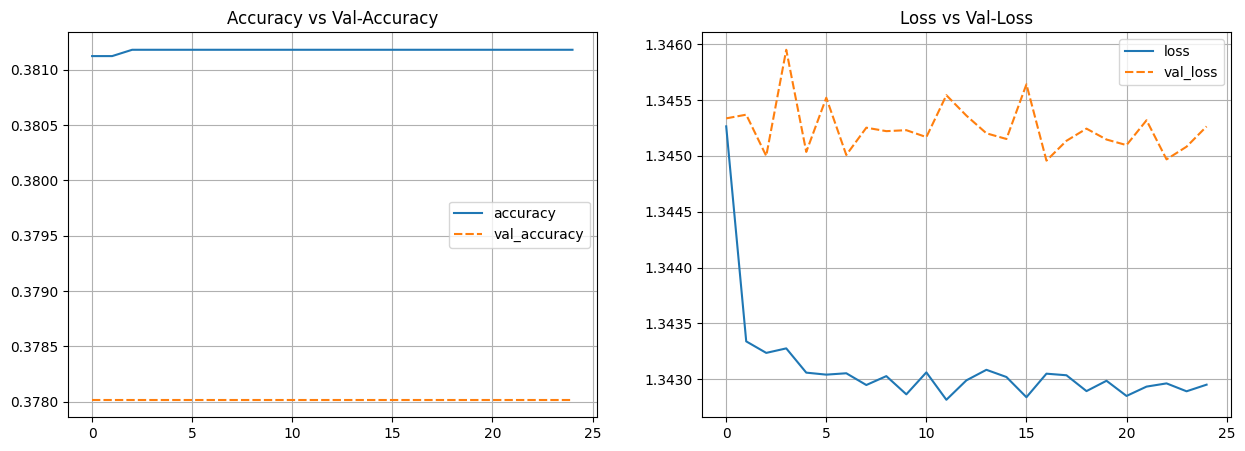

In [36]:
# Plot Training Results

model_1_hist_df = pd.DataFrame(model_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Berdasarkan dua visual di atas,
* Pada grafik 'Accuracy vs Val-Accuracy', nilai accuracy dan val-accuracy bersifat stagnan dan rendah.
* Pada grafik 'Loss vs Val-Loss', nilai val-loss bersifat fluctuated dan berbeda dengan nilai loss.\
* Model bersifat underfit karena nilai accuracy dan validation accuracy rendah.
* Kondisi ini bisa saja terjadi karena model tidak cukup kompleks untuk mempelajari pola yang ada dalam dataset sehingga bersifat underfit.

In [50]:
class_names = ['Household',
               'Books',
               'Clothing & Accessories',
               'Electronics']

In [51]:
# Memprediksi data test
y_pred_4 = model_1.predict(X_train_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_train, y_pred_4_mnist, target_names=np.array(class_names)))

548/548 [==============================] - 68s 120ms/step
                        precision    recall  f1-score   support

             Household       0.38      1.00      0.55      6675
                 Books       1.00      0.00      0.00      3947
Clothing & Accessories       0.00      0.00      0.00      3612
           Electronics       0.00      0.00      0.00      3280

              accuracy                           0.38     17514
             macro avg       0.35      0.25      0.14     17514
          weighted avg       0.37      0.38      0.21     17514



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
# Memprediksi data test
y_pred_4 = model_1.predict(X_test_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_test, y_pred_4_mnist, target_names=np.array(class_names)))

261/261 [==============================] - 36s 137ms/step
                        precision    recall  f1-score   support

             Household       0.38      1.00      0.55      3153
                 Books       1.00      0.00      0.00      1868
Clothing & Accessories       0.00      0.00      0.00      1666
           Electronics       0.00      0.00      0.00      1654

              accuracy                           0.38      8341
             macro avg       0.34      0.25      0.14      8341
          weighted avg       0.37      0.38      0.21      8341



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Berdasarkan informasi di atas,
* Model memiliki nilai accuracy 0.38 berdasarkan evaluasi data train dan evaluasi data test.
* Model memiliki evaluasi 0 pada prediksi produk Clothing & Accessories dan Electronics pada data train dan test.
* Model memiliki nilai recall 1 dan precision rendah pada tipe produk Household. Lalu, model memiliki nilai recall 0 dan precision 1 pada tipe produk Books. Kondisi ini berarti, prediksi yang dihasilkan model bersifat tebak-tebakan atau random.
* Kondisi ini sesuai dengan grafik sebelumnya yang menyatakan model bersifat underfit.

In [38]:
model_1_hist_df.to_csv('model_1_hist.csv', index=False)
files.download('model_1_hist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **vii. ANN Improvement (Sequential API/Functional API)**

## **A. Model dengan Bidirectional pada layer**

Berdasarkan model sebelumnya, model bersifat underfit karena model terlalu simpel. Maka dari itu, untuk meningkatkan kualitas model, model baru dibuat dengan menambahkan layer Bidirectional pada layer. Hal ini dilakukan karena untuk meningkatkan kompleksitas model. Jika hanya menggunakan LSTM, model hanya mempelajari sekuensial berdasarkan kata sebelumnya. Dengan menggunakan Bidirectional, model dapat mempelajari sekuensial berdasarkan kata yang ada di depan dan belakang.

### **1 dan 2. Model Definition and Training**

In [39]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


# Model Architecture
model_2 = Sequential([text_vectorization,
                      embedding,

                      Bidirectional(LSTM(16, return_sequences=True)),

                      Bidirectional(LSTM(8)),

                      Dense(4, activation='softmax')])

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2_hist = model_2.fit(X_train_4, y_train_ohe, epochs=25, validation_data=(X_val_4, y_val_ohe), batch_size=100)




Epoch 1/25
176/176 [==============================] - 105s 554ms/step - loss: 0.6371 - accuracy: 0.8044 - val_loss: 0.2821 - val_accuracy: 0.9409
Epoch 2/25
176/176 [==============================] - 92s 522ms/step - loss: 0.1696 - accuracy: 0.9675 - val_loss: 0.2136 - val_accuracy: 0.9430
Epoch 3/25
176/176 [==============================] - 89s 507ms/step - loss: 0.0919 - accuracy: 0.9815 - val_loss: 0.1954 - val_accuracy: 0.9471
Epoch 4/25
176/176 [==============================] - 87s 496ms/step - loss: 0.0568 - accuracy: 0.9897 - val_loss: 0.2179 - val_accuracy: 0.9435
Epoch 5/25
176/176 [==============================] - 88s 500ms/step - loss: 0.0382 - accuracy: 0.9930 - val_loss: 0.2550 - val_accuracy: 0.9414
Epoch 6/25
176/176 [==============================] - 87s 496ms/step - loss: 0.0289 - accuracy: 0.9947 - val_loss: 0.2422 - val_accuracy: 0.9450
Epoch 7/25
176/176 [==============================] - 85s 481ms/step - loss: 0.0207 - accuracy: 0.9961 - val_loss: 0.2698 - val_a

### **3. Model Evaluation**

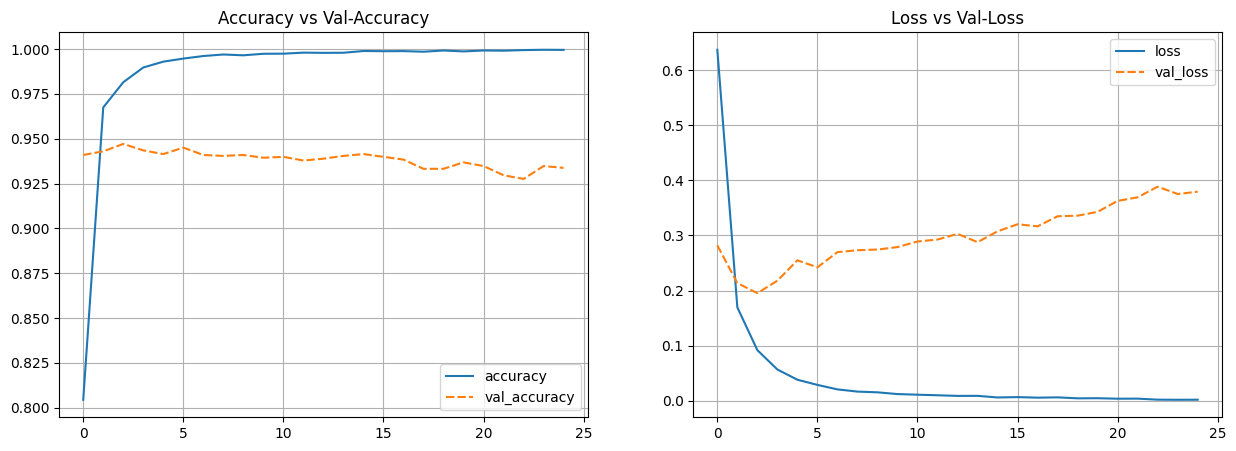

In [41]:
# Plot Training Results

model_2_hist_df = pd.DataFrame(model_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Berdasarkan dua visual di atas,
* Pada grafik 'Accuracy vs Val-Accuracy', nilai accuracy adalah mendekati 1 pada epoch 10. Namun, nilai val-accuracy menurun dari nilai 0.95 pada epoch 1 hingga 0.93 pada epoch 25.
* Pada grafik 'Loss vs Val-Loss', nilai loss adalah mendekati 0 pada epoch 15. Namun, nilai val-loss meningkat dari nilai 0.2 pada epoch 3 hingga 0.4 pada epoch 25.
* Model ini bersifat overfit karena terdapat perbedaan yang signifikan antara nilai accuracy dengan val-accuracy.
* Jika dibandingkan dengan model pertama, model ini dikatakan lebih baik karena memiliki nilai accuracy yang mendekati 1 dan nilai loss yang mendekati 0. Hal ini berarti layer Bidirectional berhasil meningkatkan performa model.
* Model bersifat overfit bisa saja terjadi karena model terlalu kompleks untuk mempelajari pola yang ada dalam dataset sehingga memberatkan kerja model.

In [52]:
# Memprediksi data test
y_pred_4 = model_2.predict(X_train_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_train, y_pred_4_mnist, target_names=np.array(class_names)))

548/548 [==============================] - 109s 196ms/step
                        precision    recall  f1-score   support

             Household       1.00      1.00      1.00      6675
                 Books       1.00      1.00      1.00      3947
Clothing & Accessories       1.00      1.00      1.00      3612
           Electronics       1.00      1.00      1.00      3280

              accuracy                           1.00     17514
             macro avg       1.00      1.00      1.00     17514
          weighted avg       1.00      1.00      1.00     17514



In [55]:
# Memprediksi data test
y_pred_4 = model_2.predict(X_test_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_test, y_pred_4_mnist, target_names=np.array(class_names)))

261/261 [==============================] - 65s 250ms/step
                        precision    recall  f1-score   support

             Household       0.93      0.96      0.95      3153
                 Books       0.93      0.94      0.94      1868
Clothing & Accessories       0.99      0.94      0.96      1666
           Electronics       0.94      0.91      0.92      1654

              accuracy                           0.94      8341
             macro avg       0.95      0.94      0.94      8341
          weighted avg       0.94      0.94      0.94      8341



Berdasarkan informasi di atas,
* Model memiliki nilai accuracy 1 berdasarkan evaluasi data train.
* Model memiliki nilai accuracy 0.94 berdasarkan evaluasi data test.
* Artinya model bersifat underfit, sesuai dengan grafik sebelumnya.


In [42]:
model_2_hist_df.to_csv('model_2_hist.csv', index=False)
files.download('model_2_hist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **B. Model dengan Bidirectional pada layer dan jumlah neuron yang lebih rendah**

Berdasarkan model sebelumnya, model bersifat overfit karena model terlalu kompleks. Maka dari itu, untuk meningkatkan kualitas model, model baru dibuat dengan menurunkan layer sebelumnya.

### **1 dan 2. Model Definition and Training**

In [43]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


# Model Architecture
model_3 = Sequential([text_vectorization,
                      embedding,

                      Bidirectional(LSTM(8, return_sequences=True)),

                      Bidirectional(LSTM(4)),

                      Dense(4, activation='softmax')])

# Compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3_hist = model_3.fit(X_train_4, y_train_ohe, epochs=25, validation_data=(X_val_4, y_val_ohe), batch_size=100)




Epoch 1/25
176/176 [==============================] - 102s 541ms/step - loss: 0.8564 - accuracy: 0.8095 - val_loss: 0.6641 - val_accuracy: 0.9322
Epoch 2/25
176/176 [==============================] - 92s 523ms/step - loss: 0.3701 - accuracy: 0.9852 - val_loss: 0.4284 - val_accuracy: 0.9373
Epoch 3/25
176/176 [==============================] - 91s 517ms/step - loss: 0.2312 - accuracy: 0.9900 - val_loss: 0.3836 - val_accuracy: 0.9337
Epoch 4/25
176/176 [==============================] - 87s 492ms/step - loss: 0.1580 - accuracy: 0.9932 - val_loss: 0.3563 - val_accuracy: 0.9296
Epoch 5/25
176/176 [==============================] - 85s 485ms/step - loss: 0.1108 - accuracy: 0.9954 - val_loss: 0.3298 - val_accuracy: 0.9281
Epoch 6/25
176/176 [==============================] - 87s 492ms/step - loss: 0.0813 - accuracy: 0.9972 - val_loss: 0.3271 - val_accuracy: 0.9312
Epoch 7/25
176/176 [==============================] - 86s 490ms/step - loss: 0.0678 - accuracy: 0.9969 - val_loss: 0.4963 - val_a

### **3. Model Evaluation**

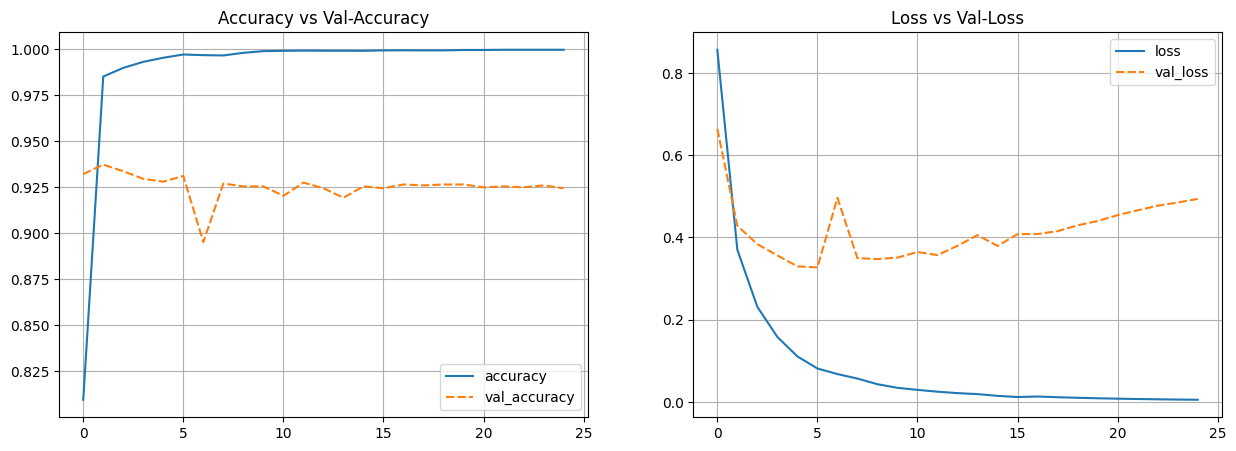

In [44]:
# Plot Training Results

model_3_hist_df = pd.DataFrame(model_3_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_3_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_3_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Berdasarkan dua visual di atas,
* Pada grafik 'Accuracy vs Val-Accuracy', nilai accuracy adalah mendekati 1 pada epoch 10. Namun, nilai val-accuracy selalu berada di nilai 0.95.
* Pada grafik 'Loss vs Val-Loss', nilai loss adalah mendekati 0 pada epoch 15. Namun, nilai val-loss meningkat dari nilai 0.35 pada epoch 5 hingga 0.5 pada epoch 25.
* Model ini bersifat overfit karena terdapat perbedaan yang signifikan antara nilai accuracy dengan val-accuracy.
* Jika dibandingkan dengan model pertama, model ini dikatakan lebih buruk karena memiliki nilai val-accuracy yang lebih rendah daripada sebelumnya. Hal ini berarti dengan menggunakan jumlah neuron yang lebih rendah tidak cocok untuk menurunkan kompleksitas model.
* Model bersifat overfit bisa saja terjadi karena model terlalu kompleks untuk mempelajari pola yang ada dalam dataset sehingga memberatkan kerja model.

In [53]:
# Memprediksi data test
y_pred_4 = model_3.predict(X_train_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_train, y_pred_4_mnist, target_names=np.array(class_names)))

548/548 [==============================] - 108s 195ms/step
                        precision    recall  f1-score   support

             Household       1.00      1.00      1.00      6675
                 Books       1.00      1.00      1.00      3947
Clothing & Accessories       1.00      1.00      1.00      3612
           Electronics       1.00      1.00      1.00      3280

              accuracy                           1.00     17514
             macro avg       1.00      1.00      1.00     17514
          weighted avg       1.00      1.00      1.00     17514



In [56]:
# Memprediksi data test
y_pred_4 = model_3.predict(X_test_4)

# Mencari nilai dengan probabilitas tertinggi
y_pred_4_mnist = np.argmax(y_pred_4, axis=-1)

# Mengevaluasi model
print(classification_report(y_test, y_pred_4_mnist, target_names=np.array(class_names)))

261/261 [==============================] - 60s 231ms/step
                        precision    recall  f1-score   support

             Household       0.95      0.93      0.94      3153
                 Books       0.90      0.95      0.93      1868
Clothing & Accessories       0.98      0.94      0.96      1666
           Electronics       0.90      0.93      0.91      1654

              accuracy                           0.94      8341
             macro avg       0.93      0.94      0.94      8341
          weighted avg       0.94      0.94      0.94      8341



Berdasarkan informasi di atas,
* Model ini tidak memiliki perubahan yang signifikan dibandingkan model sebelumnya berdasarkan hasil evaluasi.
* Model memiliki nilai accuracy 1 berdasarkan evaluasi data train.
* Model memiliki nilai accuracy 0.94 berdasarkan evaluasi data test.
* Artinya model bersifat underfit, sesuai dengan grafik sebelumnya.

# **viii. Model Saving**

Berdasarkan evaluasi sebelumnya, model kedua adalah yang terbaik dari keduanya. Model kedua lebih baik dibandingkan dengan model ketiga karena memiliki nilai val-accuracy yang lebih tinggi. Model kedua lebih baik dibandingkan dengan model pertama karena nilai accuracy dan val-accuracy berada di atas 0.9. Maka dari itu, model yang disimpan dan digunakan untuk menyelesaikan masalah adalah model kedua.

Bagian ini bertujuan untuk menyimpan model.

In [48]:
# Menyimpan model yang sudah dilatih
model_2.save("model_2", save_format='tf')

# Men-zip model yang telah dilatih
shutil.make_archive("model_2", 'zip', "model_2")

# Mengunduh model
files.download("model_2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **ix. Model Inference**

Bagian ini akan diberlakukan pada file terpisah.

# **x. Pengambilan Kesimpulan**

Walau model bersifat overfit dimana terdapat perbedaan pada nilai akurasi dengan validasi-akurasi, kedua nilai ini berada di atas 9.3. Lalu, walau model bersifat overfit dimana terdapat perbedaan pada nilai akurasi training dengan akurasi test, kedua nilai ini juga berada di atas 9.3. Hal ini berarti untuk setiap 10 kali prediksi, rata-rata prediksi yang benar adalah 9 prediksi. Kondisi ini dapat membuat model mampu untuk membantu seller untuk memilih tipe produk yang cocok dengan produk yang akan seller jual. Hasil model ini hanya digunakan sebagai insight tambahan oleh seller, bukan dijadikan sebagai alasan utama seller memilih tipe produk. Sehingga, kesalahan 10% dari model diasumsikan tidak berakibat fatal.